In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
import networkx as nx

In [2]:
#PROYECCION BOGOTÁ
EPSG = 'EPSG:21897'

In [3]:
ZAT_index = pd.read_csv("bogota/zat_index.txt", sep=" ", header=None, names=["ZAT", "index"])
ZAT = gpd.read_file("bogota/ZAT/ZAT.shp")[['ZAT', 'geometry']].to_crs(EPSG)
ZAT = ZAT.merge(ZAT_index, on="ZAT")

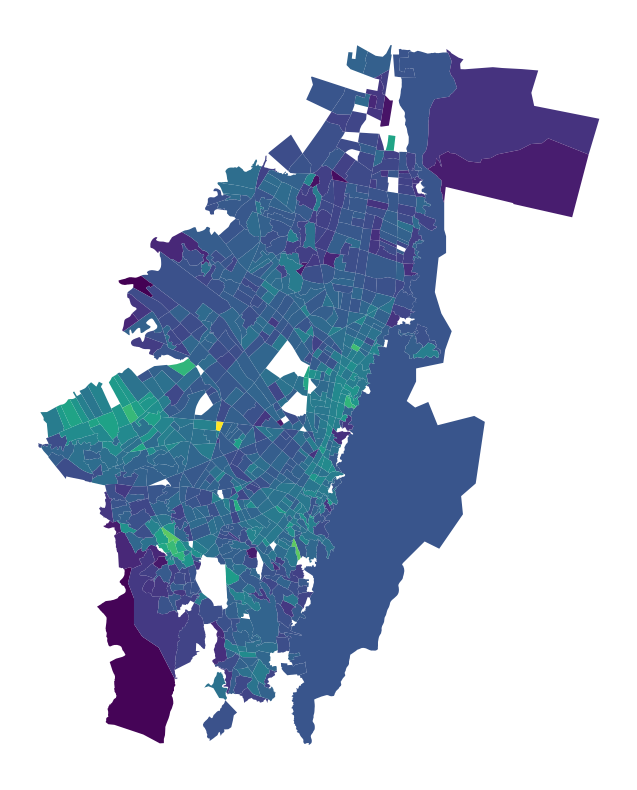

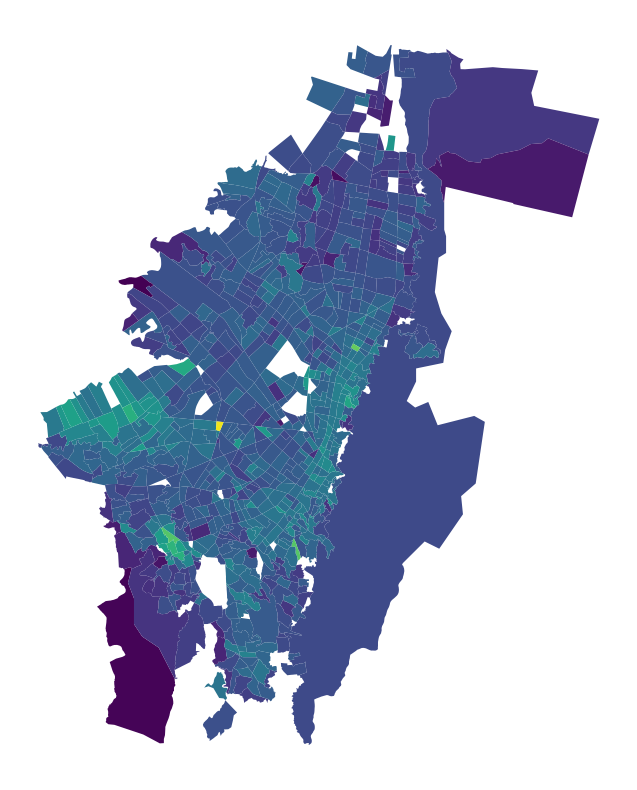

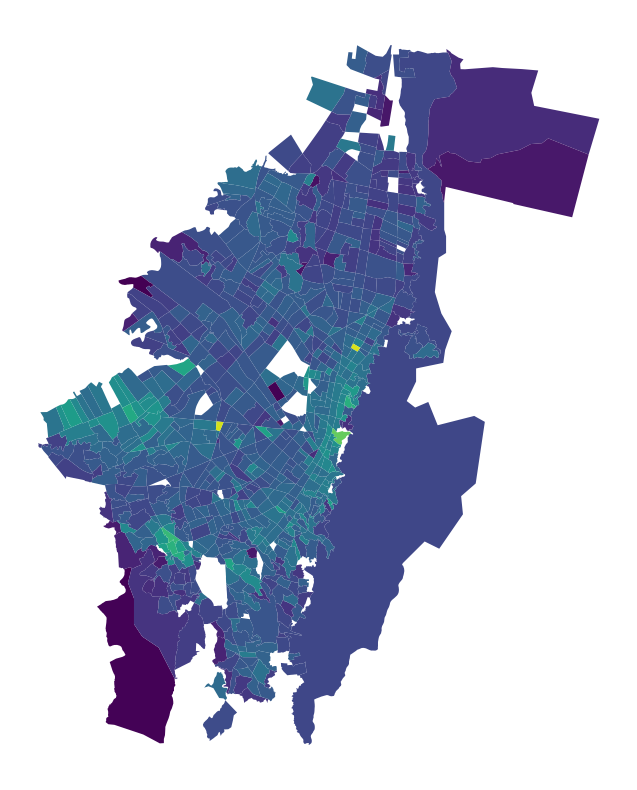

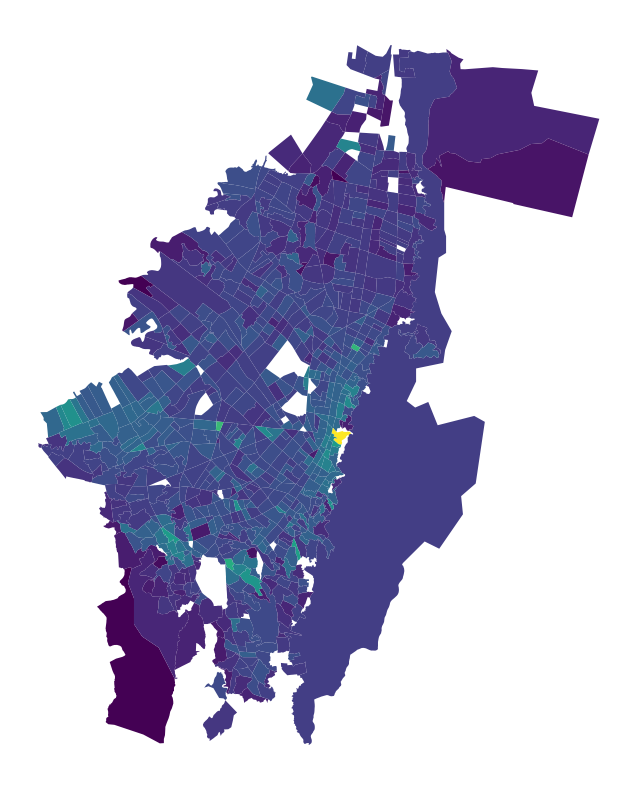

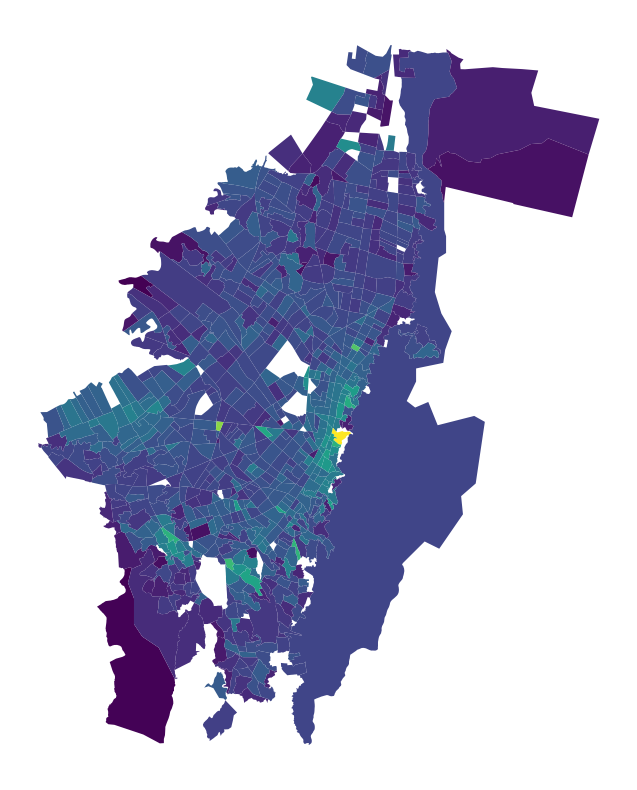

In [17]:
for links in ['8k', '10k', '15k', '28k', '45k']:
    attackRate=pd.read_csv(
        f'../../map_impact_confinement/out/map_impact_confinement/bogota_beta_4,0_200k_links_{links}.txt', sep='\t')
    attackRate = pd.merge(ZAT, attackRate, left_on='index', right_on='index')

    fig, ax = plt.subplots(figsize=(10,10))
    attackRate.plot('origin_mean', ax=ax, cmap = mpl.colormaps.get_cmap('viridis'), norm=mpl.colors.Normalize(0,0.6))

    #remove axis
    ax.set_axis_off()

    # plt.savefig(f'out/links_origin_bogota_{links}.pdf', dpi=300, bbox_inches='tight')

# GEO cities3

In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [15]:
zcta = gpd.read_file('geo/zcta510/tl_2020_us_zcta510.shp')
zcta = zcta.astype({'ZCTA5CE10': 'int64'})

In [10]:
statename = 'fl'
city = 'miami'

states_fips = pd.read_csv('geo/states_fips.txt',sep=',', index_col=0)
statefip = states_fips.loc[statename,'FIPS']


zcta_index = pd.read_csv('cities3/'+city+'/zcta_index.csv', sep=' ')#.reset_index()
zcta_index = zcta.merge(zcta_index, left_on='ZCTA5CE10', right_on='zcta')
zcta_index = zcta_index.sort_values('zcta_index')[['zcta', 'zcta_index', 'geometry']].rename(columns={'zcta_index':'index'})

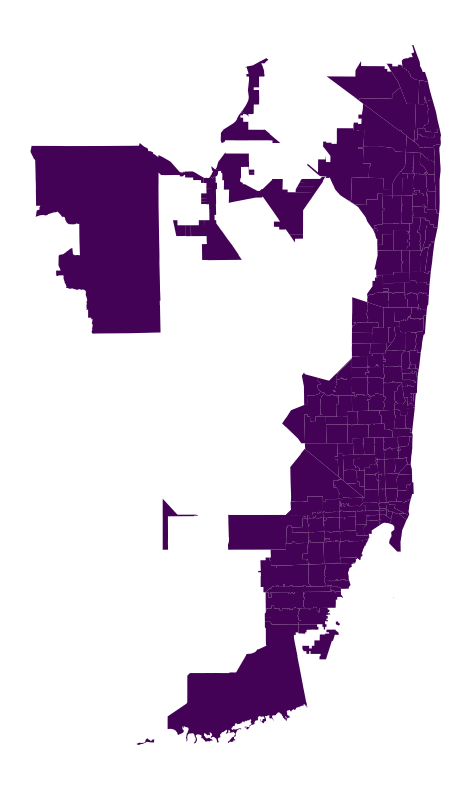

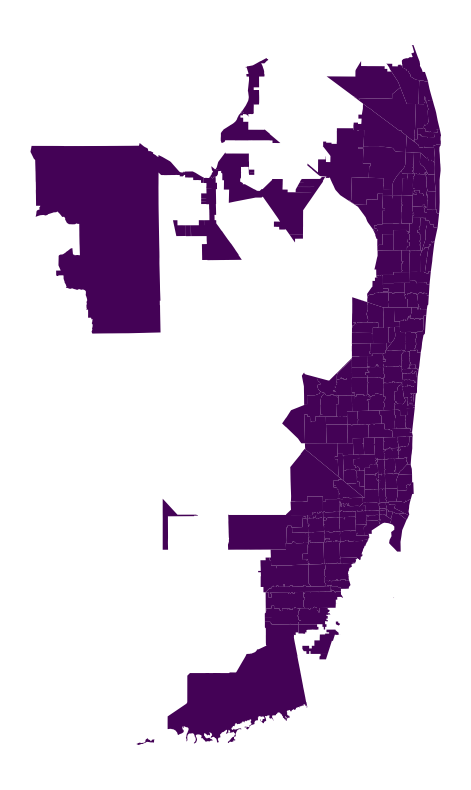

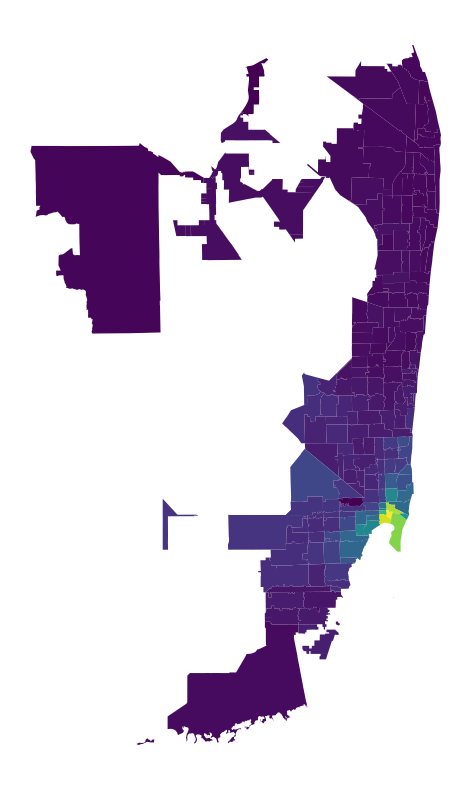

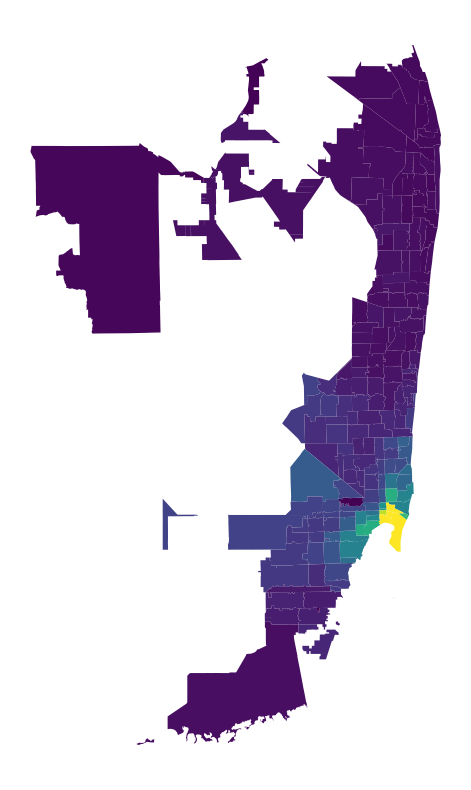

In [17]:
for links in ['2k', '4k', '6k', '8k']:
    norm = Normalize(0,0.1)
    attackRate=pd.read_csv(
        f'../../map_impact_confinement/out/map_impact_confinement/{city}_beta_4,0_200k_links_{links}.txt', sep='\t')
    attackRate = pd.merge(zcta_index, attackRate, left_on='index', right_on='index')

    fig, ax = plt.subplots(figsize=(10,10))
    attackRate.plot('origin_mean', ax=ax, cmap = mpl.colormaps.get_cmap('viridis'), linewidth=0, alpha=1, norm=norm)#, norm=Normalize(vmin=0, vmax=1))

    # ax.set_xlim(-71.2, -71.0)
    # ax.set_ylim(42.25, 42.45)

    #remove axis
    ax.set_axis_off()

    plt.savefig(f'out/links_origin_{city}_{links}.pdf', dpi=300, bbox_inches='tight')

In [31]:
statename = 'fl'
city = 'miami'

states_fips = pd.read_csv('geo/states_fips.txt',sep=',', index_col=0)
statefip = states_fips.loc[statename,'FIPS']


zcta_index = pd.read_csv('cities3/'+city+'/zcta_index.csv', sep=' ')#.reset_index()
zcta_index = zcta.merge(zcta_index, left_on='ZCTA5CE10', right_on='zcta')
zcta_index = zcta_index.sort_values('zcta_index')[['zcta', 'zcta_index', 'geometry']].rename(columns={'zcta_index':'index'})

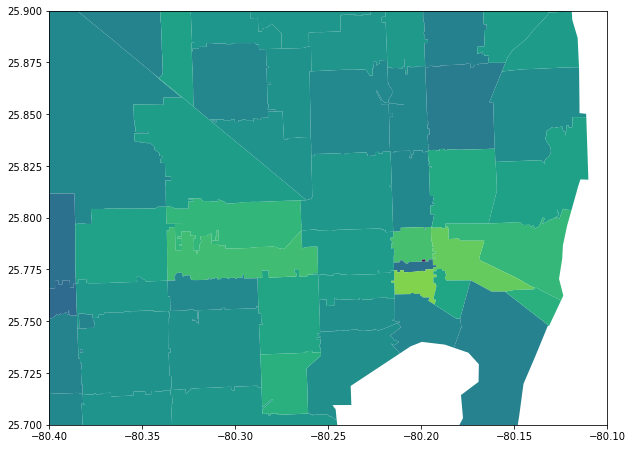

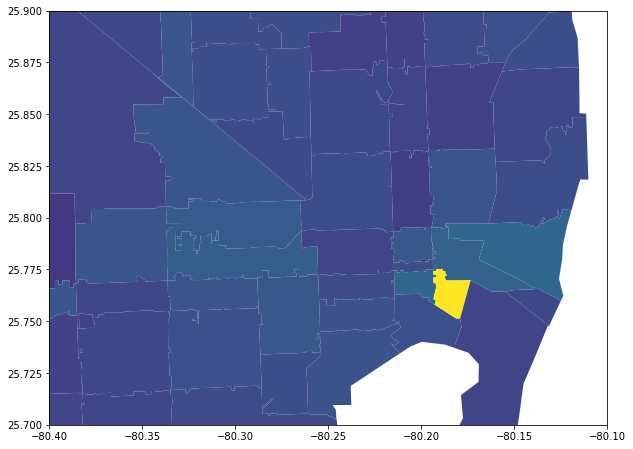

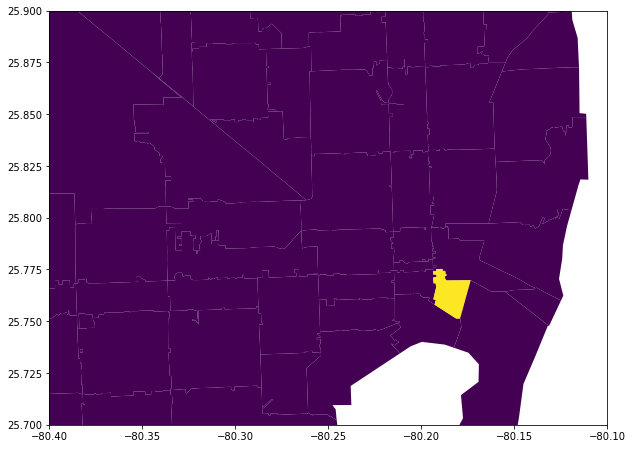

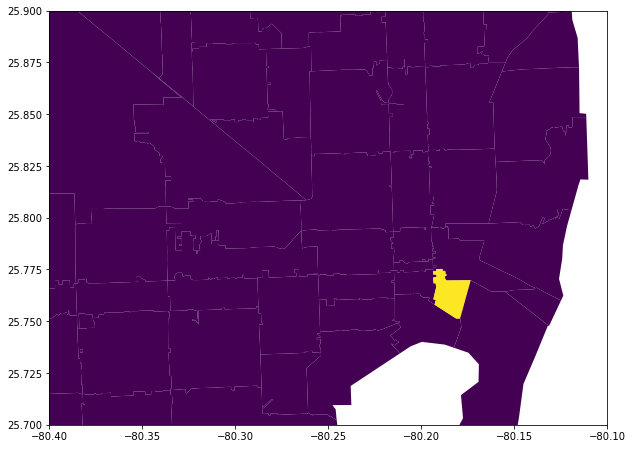

In [36]:
for links in ['2k', '4k', '6k', '8k']:
    norm = Normalize()
    attackRate=pd.read_csv(
        f'../../map_impact_confinement/out/map_impact_confinement/{city}_beta_4,0_200k_links_{links}.txt', sep='\t')
    attackRate = pd.merge(zcta_index, attackRate, left_on='index', right_on='index')

    fig, ax = plt.subplots(figsize=(10,10))
    attackRate.plot('destination_mean', ax=ax, cmap = mpl.colormaps.get_cmap('viridis'), linewidth=0, alpha=1, norm=norm)#, norm=Normalize(vmin=0, vmax=1))

    ax.set_xlim(-80.4, -80.1)
    ax.set_ylim(25.7, 25.9)